# HACKATHON PROJECT ON CONNECTING TRAVELLERS WITH AUTHENTIC EXPERIENCE 

In [2]:
#Step 1: importing libraries
import pandas as pd
import pickle

# Step 2: Data Collection
# Load data from CSV
local_experiences_df = pd.read_csv('local_experiences_indian.csv')

# Display the first few rows of the DataFrame to inspect the data
local_experiences_df


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


experience_id                 experience_name          location  \
0              11                  Taj Mahal Tour              Agra   
1              12        Spice Market Exploration             Delhi   
2              13                Backwater Cruise            Kerala   
3              14       Trekking in the Himalayas  Himachal Pradesh   
4              15       Ayurvedic Massage Retreat               Goa   
5              16             Cultural Dance Show         Rajasthan   
6              17             Tea Plantation Tour        Darjeeling   
7              18                    Yoga Retreat         Rishikesh   
8              19              Folk Music Concert     Uttar Pradesh   
9              20                   Cooking Class            Jaipur   
10             21             Golden Temple Visit          Amritsar   
11             22                   Jungle Safari       Bandhavgarh   
12             23                   Elephant Ride            Jaipur   
13             24     Kathakali Dance Performance             Kochi   
14             25                  Houseboat Stay          Alleppey   
15             26              Bird Watching Tour         Bharatpur   
16             27                   Desert Safari         Jaisalmer   
17             28                     Spa Retreat           Udaipur   
18             29    Boat Ride to Elephanta Caves            Mumbai   
19             30                Horseback Riding            Manali   
20             31             White Water Rafting         Rishikesh   
21             32                    Tiger Safari       Ranthambore   
22             33         Tibetan Monastery Visit       Dharamshala   
23             34                    Camel Safari           Pushkar   
24             35          Ganges River Boat Tour          Varanasi   
25             36      Sikkim Trekking Expedition           Gangtok   
26             37         Kathmandu Cultural Tour         Kathmandu   
27             38                Goan Beach Party               Goa   
28             39           Bollywood Studio Tour            Mumbai   
29             40        Pondicherry Cycling Tour       Pondicherry   
30             41                Goa Scuba Diving               Goa   
31             42              Mysore Palace Tour            Mysore   
32             43           Kerala Houseboat Stay          Alleppey   
33             44      Leh Ladakh Motorcycle Tour               Leh   
34             45        Kanyakumari Sunrise Tour       Kanyakumari   
35             46        Kolkata Street Food Tour           Kolkata   
36             47    Gujarat Handicrafts Shopping         Ahmedabad   
37             48            Haridwar Ganga Aarti          Haridwar   
38             49          Jodhpur Desert Camping           Jodhpur   
39             50  Udaipur Lake Pichola Boat Ride           Udaipur   

                category                                        description  \
0        Historical Tour  Discover the breathtaking beauty and rich hist...   
1            Market Tour  Experience the vibrant colors and aromatic spi...   
2                 Cruise  Sail through the serene backwaters of Kerala o...   
3              Adventure  Embark on an exhilarating trekking adventure i...   
4       Wellness Retreat  Relax and rejuvenate with traditional Ayurvedi...   
5   Cultural Performance  Immerse yourself in the vibrant culture of Raj...   
6        Plantation Tour  Explore the scenic tea plantations of Darjeeli...   
7       Wellness Retreat  Embark on a spiritual journey with yoga and me...   
8   Cultural Performance  Experience the soulful melodies of Indian folk...   
9          Cooking Class  Learn the secrets of Rajasthani cuisine with h...   
10        Religious Tour  Visit the iconic Golden Temple in Amritsar and...   
11             Adventure  Embark on an exciting jungle safari in Bandhav...   
12             Adventure  Ride on majestic elephants and explore 

In [3]:
# Step 3: Data Processing and Analysis
local_experiences_df.dropna(inplace=True)

# Analyze the data
# calculate average rating and price per category
average_rating_per_category = local_experiences_df.groupby('category')['rating'].mean()
average_price_per_category = local_experiences_df.groupby('category')['price'].mean()

# Display the results
print("Average rating per category:")
print(average_rating_per_category)
print("\nAverage price per category:")
print(average_price_per_category)


Average rating per category:
category
Adventure               4.716667
Cooking Class           4.800000
Cruise                  4.766667
Cultural Performance    4.566667
Cultural Tour           4.650000
Entertainment Tour      4.600000
Food Tour               4.400000
Historical Tour         4.733333
Market Tour             4.500000
Nature Tour             4.400000
Nightlife Tour          4.800000
Plantation Tour         4.700000
Religious Tour          4.700000
Shopping Tour           4.800000
Sightseeing Tour        4.550000
Spiritual Tour          4.850000
Wellness Retreat        4.700000
Wildlife Tour           4.700000
Name: rating, dtype: float64

Average price per category:
category
Adventure                97.500000
Cooking Class            70.000000
Cruise                  183.333333
Cultural Performance     60.000000
Cultural Tour            75.000000
Entertainment Tour       60.000000
Food Tour                20.000000
Historical Tour         703.333333
Market Tour          

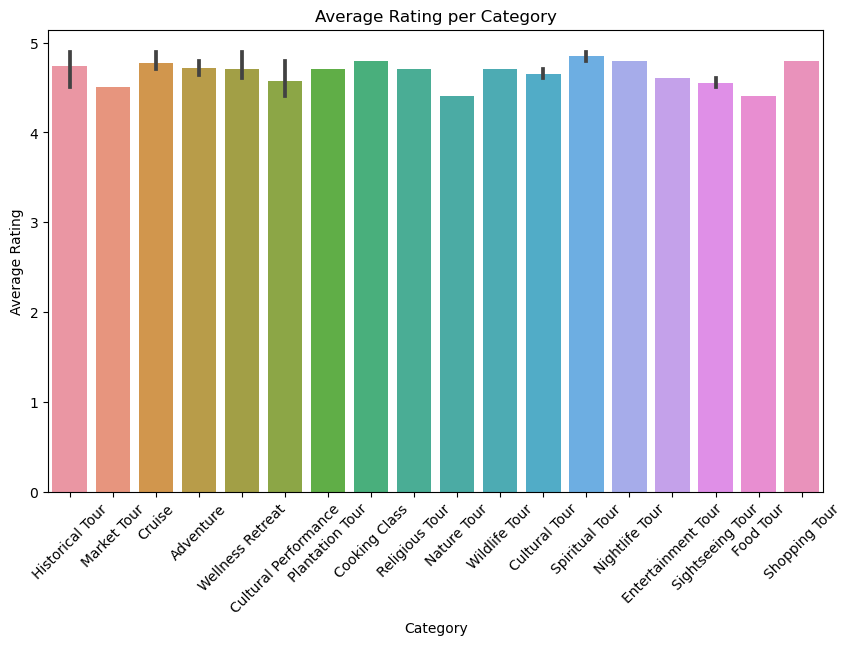

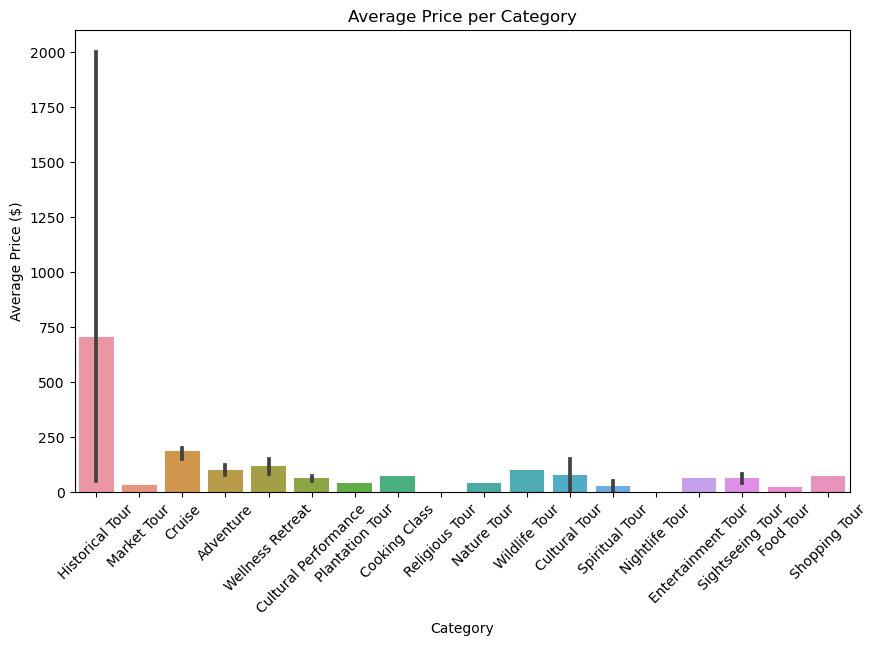

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting average rating per category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='rating', data=local_experiences_df)
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Plotting average price per category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='price', data=local_experiences_df)
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def recommend_places(user_preferences, data):
    # Filter data based on user preferences
    filtered_data = data.copy()
    for preference, value in user_preferences.items():
        if preference == 'price_range':
            filtered_data = filtered_data[(filtered_data['price'] >= value[0]) & (filtered_data['price'] <= value[1])]
        elif preference == 'min_rating':
            filtered_data = filtered_data[filtered_data['rating'] >= value]
        else:
            filtered_data = filtered_data[filtered_data[preference] == value]

    # Sort filtered data by rating in descending order
    filtered_data = filtered_data.sort_values(by='rating', ascending=False)

    return filtered_data  

# Define user preferences based on input
user_preferences = {
    'category': input("Enter category: "),
    'price': int(input("Enter minimum price: ")),
    'rating': float(input("Enter minimum rating: "))
}

# Call the recommend_places function
recommended_places = recommend_places(user_preferences, local_experiences_df)

# Display the recommended places
print(recommended_places)



In [ ]:
pickle.dump(recommend_places, open('iri.pkl','wb'))